In [1]:
from IPython.core.display import HTML
%matplotlib inline

<div style="margin: 0 auto;">
    <img src='imagens/ic.png' style='display: inline;' height=150 width=150/>
</div>

# Primeiros Passos em Aprendizado de Máquina com sklearn

<div style='float: right;'>
    <h3>Daniel Junior</h3>
    <span>Doutorando em Ciência da Computação</span><br/>
    <br/>
    <span><strong>Orientadores:</strong> Aline Paes, Daniel Oliveira</span><br/>
<div>

# Roteiro

- Introdução
- Tipos de Aprendizado de Máquina
    - Aprendizado Supervisionado
        - Classificação
            - Avaliação
    - Aprendizado Não-Supervisionado
        - Agrupamento
- Visualização


# Introdução

- Objetivo: Fazer com que computadores se auto-programem
- Automação da automação
- Mudança de paradigma:
    - ### Entrada + <span style="color:blue">**Programa**</span> = Saída
    - ### Entrada + Saída = <span style="color:blue">**Programa**</span>


# Quando um programa está aprendendo?

> ### Um programa aprende a  partir da experiência  E,  em  relação  a uma  classe  de tarefas T, com medida de desempenho P, se seu desempenho em T, medido por P, melhora com E.

<div style='float: right;'> Mitchell, 1997</div>

### <u>Exemplo</u>
- Detecção de bons clientes para adquirirem um cartão de crédito
    - **Tarefa T:** classificar potenciais novos clientes como bons ou maus pagadores
    - **Medida de Desempenho P:** porcentagem de clientes classificados corretamente
    - **Experiência de Treinamento E:** uma base de dados histórica em que os clientes já conhecidos são previamente classificados como bons ou maus pagadores

# Por que simplesmente não programar a melhora?

- Nem sempre é possível <span style="color:red">antecipar todas</span> as possíveis <span style="color:red">situações</span>.
[//]: # (Ex.: um robô que caminha em labirintos)
- Não é possível <span style="color:red">antecipar todas as mudanças</span> que podem ocorrer com o tempo.
[//]: # (Ex.: Programa que prediz valores no mercado de ações deve se adaptar às mudanças na economia)
- O programador <span style="color:red">não sabe como programar a solução</span> para um problema
[//]: # (Como fazer um computador reconhecer faces?)

# Componentes Principais do Aprendizado de Máquina
- **Modelo**

- **Representação**

- **Conhecimento a priori**

- **Avaliação**

- **Otimização**


# Tipos de Aprendizado
<center>
    <img src="imagens/tipos.png" height='550' width='800'>
</center>
<span>Fonte: https://i.imgur.com/mZdJLdg.png</span>

# Ferramentas para Aprendizado de Máquina
<br/>
<center>  
    <img src="imagens/scikit.png" style="display: inline; margin-right: 10%;">
    <img src="imagens/weka.png" style="display: inline;">
</center>

# Aprendizado Supervisionado

- Dados de treinamento **incluem** a saída desejada


- Dado um conjunto de treinamento com **N** exemplos, representados por meio de pares de entrada e saída
    - (x<sub>1</sub>,y<sub>1</sub>), (x<sub>2</sub>,<sub>y2</sub>), ..., (x<sub>n</sub>,y<sub>n</sub>)
onde cada y<sub>i</sub> foi gerado por uma **função desconhecida y = f(x)**
    - descobrir uma função <span style="color:blue">**h** (hipótese)</span> que é uma <span style="color:red">aproximação</span> da função verdadeira **f**


# Classificação

- Quando o <u>domínio</u> de **f(x)** é um conjunto **finito de valores**, a tarefa é conhecida como **Classificação**

- Exemplo: 
    - Predizer a espécie de uma flor, a partir de medidas das pétalas e sépalas

<center>
    <img src="imagens/iris.png" height='550' width='800'>
</center>
<span>Fonte:http://vsantos.me/img/2020-10-07_11-24-45_iris.png</span>

# KNN (K Nearest Neighbors)

- Modelo do tipo _Lazy_
- Encontra o **k vizinhos mais próximos** e realiza a predição baseada nas classes desses vizinhos
<center>
<img src="imagens/knn.gif">
</center>
<span>Fonte: https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/63621/versions/2/screenshot.gif</span>

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
print('Dados: ', iris.data[:10])
print()
print('Saída: ', iris.target[:10])

Dados:  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

Saída:  [0 0 0 0 0 0 0 0 0 0]


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


iris_data_train, iris_data_test, iris_target_train, iris_target_test = train_test_split(
     iris.data, iris.target, test_size=0.2, random_state=42)

k = 7

knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(iris_data_train, iris_target_train)

print('Instância:',iris_data_test[0])
prediction = knn.predict([iris_data_test[0]])[0]
print('Predição:',prediction, '->' ,iris.target_names[prediction])

knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
knn.fit(iris_data_train, iris_target_train)

print('\nInstância:', iris_data_test[0])
prediction = knn.predict([iris_data_test[0]])[0]
print('Predição:',prediction, '->' , iris.target_names[prediction])

Instância: [6.1 2.8 4.7 1.2]
Predição: 1 -> versicolor

Instância: [6.1 2.8 4.7 1.2]
Predição: 1 -> versicolor


# SVM (Support Vector Machines)

- Cada exemplo é visto como um ponto em um espaço de n-dimensões
    - **n** = número de atributos
        - o valor de cada atributo está em uma coordenada particular
- Classificação se reduz a encontrar o **hiperplano** que diferencia as classes 
- **Vetores de suporte**: coordenadas das observações individuais
<center>
<img src="imagens/svm_support.png">
    </center>



# SVM - Como encontrar o hiperplano?

<center>    
    <img src="imagens/svm1.png" style="display:inline;">
    <img src="imagens/svm2.png" style="display:inline;">
</center>

# SVM - A ou B?
<center>
<img src="imagens/svm4.png"/>
</center>

# SVM: e agora?
<center>
<img src="imagens/svm_kernel.png"/>
    </center>

# SVM: Kernel Trick

- Função que transforma os dados em uma dimensão para outra dimensão maior 
    - Converte problemas não separáveis em problemas separáveis
    - **Função de kernel**
    
<center>
<img src="imagens/kernel_trick.png"/>
</center>


# Drug dataset

- https://www.kaggle.com/prathamtripathi/drug-classification

In [5]:
import pandas as pd

drugs = pd.read_csv('drug200.csv', sep=',')
drugs

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [6]:
drugs_target = drugs[['Drug']]
drugs_target

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY
...,...
195,drugC
196,drugC
197,drugX
198,drugX


In [7]:
drugs_data = drugs[drugs.columns.difference(['Drug'])]
drugs_data

,Age,BP,Cholesterol,Na_to_K,Sex
0,23,HIGH,HIGH,25.355,F
1,47,LOW,HIGH,13.093,M
2,47,LOW,HIGH,10.114,M
3,28,NORMAL,HIGH,7.798,F
4,61,LOW,HIGH,18.043,F
...,...,...,...,...,...
195,56,LOW,HIGH,11.567,F
196,16,LOW,HIGH,12.006,M
197,52,NORMAL,HIGH,9.894,M
198,23,NORMAL,NORMAL,14.020,M


In [8]:
pd.options.mode.chained_assignment = None

# Pré-processamento de dados

In [9]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False, dtype=int)
enc.fit(drugs_data[['BP','Cholesterol','Sex']])
print(enc.categories_)

drugs_data_enc = enc.transform(drugs_data[['BP','Cholesterol','Sex']])
print(drugs_data_enc[0])

enc.get_feature_names()

[array(['HIGH', 'LOW', 'NORMAL'], dtype=object), array(['HIGH', 'NORMAL'], dtype=object), array(['F', 'M'], dtype=object)]
[1 0 0 1 0 1 0]


array(['x0_HIGH', 'x0_LOW', 'x0_NORMAL', 'x1_HIGH', 'x1_NORMAL', 'x2_F',
       'x2_M'], dtype=object)

In [10]:
new_drugs_data = drugs_data[['Age','Na_to_K']]
new_drugs_data
for i, fname in enumerate(enc.get_feature_names()):
    new_drugs_data[fname] = drugs_data_enc[:,i]

new_drugs_data

,Age,Na_to_K,x0_HIGH,x0_LOW,x0_NORMAL,x1_HIGH,x1_NORMAL,x2_F,x2_M
0,23,25.355,1,0,0,1,0,1,0
1,47,13.093,0,1,0,1,0,0,1
2,47,10.114,0,1,0,1,0,0,1
3,28,7.798,0,0,1,1,0,1,0
4,61,18.043,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
195,56,11.567,0,1,0,1,0,1,0
196,16,12.006,0,1,0,1,0,0,1
197,52,9.894,0,0,1,1,0,0,1
198,23,14.020,0,0,1,0,1,0,1


In [11]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(drugs_target.values)
print(list(le.classes_))

new_drugs_target = le.transform(drugs_target.values)
new_drugs_target

['DrugY', 'drugA', 'drugB', 'drugC', 'drugX']


array([0, 3, 3, 4, 0, 4, 0, 3, 0, 0, 3, 0, 0, 0, 4, 0, 4, 1, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 4, 2, 4, 0, 4, 4, 1, 4, 4, 4, 0, 2, 0, 4,
       4, 4, 1, 3, 0, 0, 0, 4, 0, 0, 2, 3, 2, 0, 4, 0, 0, 1, 0, 4, 2, 0,
       1, 4, 0, 0, 2, 0, 4, 0, 0, 0, 1, 0, 1, 4, 2, 4, 3, 1, 3, 2, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 1, 3, 4, 0, 4, 4, 0, 2, 0,
       1, 4, 4, 4, 4, 0, 4, 4, 1, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 4, 0, 0,
       4, 0, 0, 4, 2, 1, 2, 4, 1, 0, 2, 0, 1, 4, 4, 1, 4, 3, 1, 2, 4, 4,
       0, 3, 1, 0, 3, 4, 4, 2, 4, 0, 0, 0, 0, 4, 0, 1, 4, 4, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 4, 4, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 3, 0, 3, 3, 4,
       4, 4])

In [13]:
from sklearn import svm


drugs_data_train, drugs_data_test, drugs_target_train, drugs_target_test = train_test_split(
     new_drugs_data.values, new_drugs_target, test_size=0.2, random_state=42)

svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')
svc_model.fit(drugs_data_train, drugs_target_train)

print('Instância:', drugs_data_test[0])
prediction = svc_model.predict([drugs_data_test[0]])[0]

prediction_name = le.inverse_transform([prediction])
print('Predição:', prediction_name)

Instância: [36.    11.424  0.     1.     0.     0.     1.     0.     1.   ]
Predição: ['drugX']


# Avaliação das hipóteses

- Acurácia = Taxa de Erro
    - Proporção de erros que um modelo comete
- Taxa de Erro baixa no conjunto de treinamento não significa boa **generalização**
    - **Generalização:** capacidade de uma hipótese predizer corretamente os valores de y para novos exemplos
    - Para verificar a capacidade de generalização de uma hipótese, a avaliação deve ser em um conjunto de **exemplos não vistos** durante o **treinamento**: conjunto de teste

# Escolha da melhor hipótese
- **K-Fold Cross Validation**
    - Cada exemplo será em algum momento de treinamento ou de validação
        - Separar os dados em K subconjuntos
        - Executar o algoritmo K vezes
        - 1/K dos exemplos é de validação; o resto é de treinamento
    - se K = N: leave-one-out cross validation

# K-Fold Cross Validation
<center>
<img src="imagens/kfold.png" height='450' width='750'>
</center>
Fonte: http://i.imgur.com/gu3Fa6w.png

In [14]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

kf = KFold(n_splits=5)
svm_scores = []
knn_scores = []

for train_index, test_index in kf.split(iris.data):
    X_train, X_test = iris.data[train_index], iris.data[test_index]
    y_train, y_test = iris.target[train_index], iris.target[test_index]
    
    svc_model.fit(X_train, y_train)
    svc_predict = svc_model.predict(X_test)
    svm_scores.append(accuracy_score(y_test, svc_predict))
    
    knn.fit(X_train, y_train)
    neigh_predict = knn.predict(X_test)
    knn_scores.append(accuracy_score(y_test, neigh_predict))

In [15]:
svm_mean = np.array(svm_scores).mean()
knn_mean = np.array(knn_scores).mean()

print('SVM: ', svm_mean)
print('KNN: ', knn_mean)

SVM:  0.9333333333333333
KNN:  0.9133333333333333


# Overfitting

- Considere _error(h)_ como uma medida de quantos exemplos são incorretamente classificados pela hipótese **h**
     - Erro nos dados de treinamento: _error<sub>train</sub>(h)_
     - Erro na distribuição inteira dos dados: _error<sub>D</sub>(h)_
- Uma hipótese <span style="color:red">**overfits**</span> os dados de treinamento se:
    - Existe uma hipótese alternativa h' $\in$ H tal que
        - _error<sub>train</sub>(h)_ $ < $ _error<sub>train</sub>(h')_
        - _error<sub>D</sub>(h)_ $ > $ _error<sub>D</sub>(h')_

# Overfitting

<center>
    <img src="imagens/overfitting.png"/>
</center>

# Aprendizado Não-Supervisionado

- ### Dados de treinamento **NÃO incluem** a saída desejada


# Agrupamento
<br/>

<center>
<img src="imagens/cluster.png"/>
</center>

# K-Means

- O algoritmo compara os exemplos usando uma medida de distância
    - Euclidiana, Manhattan, etc
- Calcula centróides (pontos centrais) para cada uma das K classes
    - Começa aleatório
- Repete, refinando os valores de centróides pela média dos exemplos que pertencem ao centróide
    - A descoberta do melhor valor de K também pode ser parte do algoritmo

# K-Means

<center>
<img src="imagens/kmeans1.png"/>
</center>

# K-Means

<center>
<img src="imagens/kmeans2.png" style="display: inline;"/>
<img src="imagens/kmeans3.png" style="display: inline;"/>
</center>

# K-Means

<center>
<img src="imagens/kmeans4.png" style="display: inline;"/>
<img src="imagens/kmeans5.png" style="display: inline;"/>
</center>

# K-Means

<center>
<img src="imagens/kmeans7.png" style="display: inline;"/>
</center>

Text(0.5, 1.0, 'Dataset')

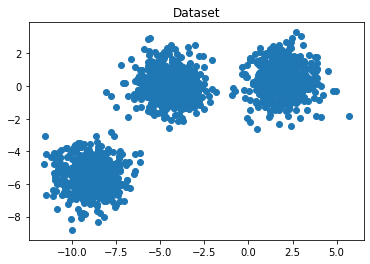

In [17]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

plt.plot()
plt.scatter(X[:, 0], X[:, 1])
plt.title("Dataset")

Text(0.5, 1.0, 'K incorreto')

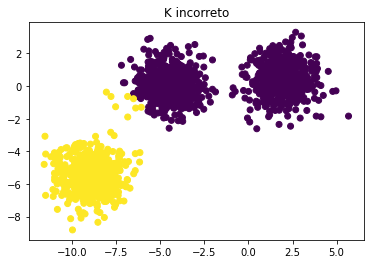

In [18]:
from sklearn.cluster import KMeans

y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)
plt.plot
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("K incorreto")

Text(0.5, 1.0, 'K correto')

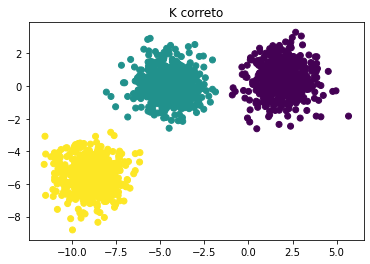

In [19]:
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)
plt.plot()
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("K correto")

# Visualização
<center>
    <img src='imagens/matplotlib.png'/>
</center>

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print('Atributos:' , len(iris.data[0]))
X = iris.data[:,:3]
y = iris.target

Atributos: 4


<Axes3D:title={'center':'Primeiros 3 atributos do Iris'}, xlabel='Sepal Length', ylabel='Sepal Width'>

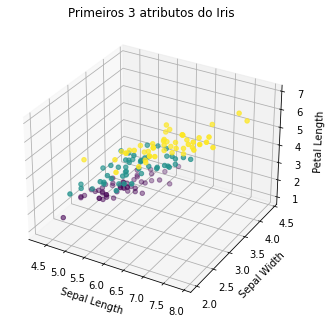

In [36]:
fig = plt.figure(1, figsize=(6, 4))
ax = Axes3D(fig, auto_add_to_figure=False)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.set_title("Primeiros 3 atributos do Iris")
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")
fig.add_axes(ax)

# Como entender e visualizar dados com muitos atributos?
Exemplos: Dados de finanças, Dados climáticos, imagens

- Usando uma técnica de redução de dimensionalidade!
    - **PCA** (Principal Component Analysis)
    - **LSA** (Latent Semantic Analysis)
    - **LDA** (Linear Discriminant Analysis)

# Análise de Componentes Principais (PCA)

- **<span style='color:blue'>Combinação linear</span>** de variáveis, contendo a mesma informação das variáveis antes da combinação

- Dados são **<span style='color:blue'>transformados</span>** para um subespaço de **<span style='color:blue'>dimensão menor</span>** em um novo sistemas de coordenadas
    - Primeiro eixo corresponde ao primeiro **<span style='color:red'>componente principal</span>**
        - Componente que explica a **<span style='color:red'>maior variância</span>** entre os dados

# Análise de Componentes Principais (PCA)

- **<span style='color:red'>Componentes Principais</span>** são os **<span style='color:red'>autovetores</span>** da matriz de covariância dos dados correspondem a direção (no espaço original) com a **<span style='color:green'>maior variância</span>** entre os dados
    - **<span style='color:green'>Autovalor</span>** correspondente é um escalar que indica **<span style='color:green'>quanta variância</span>** existe nos dados ao longo do **<span style='color:red'>autovetor (CP)</span>**

# Análise de Componentes Principais (PCA)

- Um **<span style='color:green'>autovalor grande</span>** significa que o **<span style='color:red'>autovetor (CP)</span>** explica uma <span style='color:green'>grande</span> quantidade de <span style='color:green'>variância</span> entre os dados

- Um **<span style='color:red'>autovetor (CP)</span>** com um **<span style='color:green'>autovalor zero</span>**: não explica <span style='color:green'>nenhuma variância</span> nos dados

- Para usar o PCA para reduzir a dimensionalidade, **descartamos os autovetores com autovalor zero ou quase zero**
- É indicado normalizar os dados antes...

# Análise de Componentes Principais (PCA)

- Facilita a visualização
- Pode melhorar o desempenho de alguns algoritmos
- Pode fazer com que os algoritmos rodem mais rápido
- Reduz o risco de overfitting

# Análise de Componentes Principais (PCA)

<center>
    <img src='imagens/pca1.png' style='display: inline; margin-left: -20%;'/>
    <img src='imagens/pca2.png' style='display: inline;'/>
</center>

# Análise de Componentes Principais (PCA)

<center>
    <img src='imagens/pca3.png' style='display: inline; margin-left: -20%;'/>
    <img src='imagens/pca4.png' style='display: inline;'/>
</center>

Text(0, 0.5, 'Segundo CP')

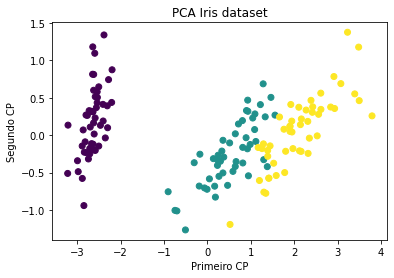

In [22]:
import matplotlib.pyplot as plt
from sklearn import decomposition

X = iris.data
y = iris.target
fig = plt.figure(1, figsize=(6, 4))
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_reduzido = pca.transform(X)
plt.scatter(X_reduzido[:,0],X_reduzido[:,1], c=y)
plt.title('PCA Iris dataset')
plt.xlabel('Primeiro CP')
plt.ylabel('Segundo CP')

# Cursos regulares no IC/UFF
- Inteligência Artificial
- Mineração de Dados
- Aprendizado de Máquina
- Tópicos Avançados em IA


# Cursos on-line
- DataCamp
- KDD Nuggets
- Udacity
- Coursera

<div>
    <img src='imagens/ic.png' style='display: inline;' height=150 width=150/>
</div>

# Primeiros Passos em Aprendizado de Máquina com sklearn

<div style='float: right;'>
    <h3>Daniel Junior</h3>
    <span>Doutorando em Ciência da Computação</span><br/>
    <br/>
    <span><strong>Orientadores:</strong> Aline Paes, Daniel Oliveira</span><br/>
    <br/>
    <span><strong>Adaptado de:</strong> <i>Aprendizado de Máquina: uma breve introdução</i> - Aline Paes</span>

</div>